In [1]:
import pandas as pd
car=pd.read_csv("car_insurance.csv",sep=";")

In [2]:
car.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,0,1,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,0,0,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,0,1,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,1,1,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


Diccionario de Variables 
id: Identificador Unico del cliente 
age: edad del cliente 
0: 16-25
1: 26-39
3: 40-64
4: 65+
diving_experience: Anos de experiencia manejando 
0: 0-9
1: 10-19
2: 20-29
3: 30+
education: Nivel de educacion del cliente
income: Nivel de ingreso del cliente
Poverty
Working Class
Middle class
upper class
credit_score: Score crediticio del cliente ( entre 0 y 1)
vehicle_ownership: Estado propiedad del cliente
0: no tiene vehiculo propio (pagando la financiacion)
1: tiene vehiculo propio 
vehicle_year: Ano del vehiculo 
married: Estado marital del cliente
0: No esta casado
1: esta casado
children: Numero de hijos del cliente 
postal_code: codigo postal del cliente
annual_mileage: Numero de millas conducidas por el cliente cada ano
vehicle_type: tipo de carro
0: sedan
1: carro deportivo
speeding_violations: Numero total de violaciones por exceso de velocidad
duis: Numero de veces que el cliente ha sido agarrado conduciendo bajo los efectos del alcohol
past_accidents: Numero total de accidentes previos en que el cliente ha estado involucrado 
outcome: Si el cliente hizo un reclamo en su seguro de coche 
0: No hay reclamo
1: Hizo un reclamo 

Verificando los NAs

In [3]:
car.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

Las variables Credit_score y annual_mileage tienen NAs.
analisis descriptivos de las variables 
Tipos de variables 

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  int64  
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  int64  
 10  children             10000 non-null  int64  
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [5]:
car['education'].value_counts()

education
high school    4157
university     3928
none           1915
Name: count, dtype: int64

Recodificando la variable en 
0: none
1: high school
2: university

In [6]:
car['education'] = car['education'].map({"none":0,"high school":1,"university":2}).astype("category")

In [7]:
car['income'].value_counts()

income
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64

Al igual que la variable education, se procede a codificar 
0: poverty
1: working class
2: middle class
3: upper class

In [8]:
car['income'] = car['income'].map({"poverty":0,"working class":1,"middle class":2,"upper class":3}).astype("category")

In [9]:
car["vehicle_type"].value_counts()

vehicle_type
sedan         9523
sports car     477
Name: count, dtype: int64

se codifica en 
0: sedan
1: sports car 

In [10]:
car['vehicle_type'] = car['vehicle_type'].map({"sedan":0,"sports car":1})

In [11]:
car['driving_experience'].value_counts()

driving_experience
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64

In [12]:
car["driving_experience"]=car["driving_experience"].map({"0-9y":0,"10-19y":1,"20-29y":2,"30y+":3}).astype("category")

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10000 non-null  int64   
 1   age                  10000 non-null  int64   
 2   gender               10000 non-null  int64   
 3   driving_experience   10000 non-null  category
 4   education            10000 non-null  category
 5   income               10000 non-null  category
 6   credit_score         9018 non-null   float64 
 7   vehicle_ownership    10000 non-null  int64   
 8   vehicle_year         10000 non-null  object  
 9   married              10000 non-null  int64   
 10  children             10000 non-null  int64   
 11  postal_code          10000 non-null  int64   
 12  annual_mileage       9043 non-null   float64 
 13  vehicle_type         10000 non-null  int64   
 14  speeding_violations  10000 non-null  int64   
 15  duis                

In [14]:
#variable outcome a categoryca
car['outcome'] = car['outcome'].astype('category')

Analizando las variables numericas en funcion de la variable outcome 

C:\Users\DELL\anaconda3\bin\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\bin\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


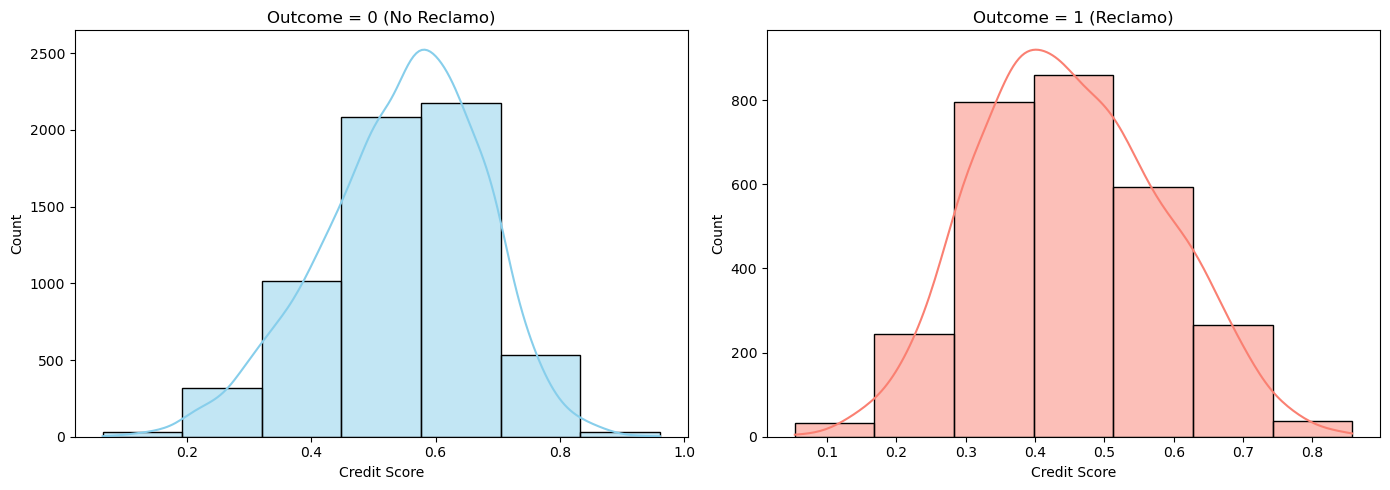

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
datos_clase_0 = car[car['outcome'] == 0]
datos_clase_1 = car[car['outcome'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 
sns.histplot(
    data=datos_clase_0, 
    x='credit_score', 
    bins=7, 
    ax=axes[0], 
    color='skyblue',
    kde=True )
axes[0].set_title('Outcome = 0 (No Reclamo)')
axes[0].set_xlabel('Credit Score')
sns.histplot(
    data=datos_clase_1, 
    x='credit_score', 
    bins=7, 
    ax=axes[1], 
    color='salmon',
    kde=True)
axes[1].set_title('Outcome = 1 (Reclamo)')
axes[1].set_xlabel('Credit Score')
plt.tight_layout()
plt.show()

Los histogramas comparativos revelan que el credit_score es un predictor fuerte del reclamo de seguro (outcome). La distribución de los clientes sin reclamo (Outcome = 0, azul) está claramente sesgada hacia la derecha (puntajes de crédito más altos), con un pico alrededor de 0.6. En contraste, la distribución de los clientes que sí reclaman (Outcome = 1, rojo) está centrada en valores más bajos, con un pico cerca de 0.45. Esta diferencia en la tendencia central y la superposición mínima indica que un menor credit_score se asocia significativamente con una mayor probabilidad de reclamo, lo que valida su uso en modelos como la Regresión Logística y SVM.
A continuacion se presenta el analisis para annual_mileage

C:\Users\DELL\anaconda3\bin\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\bin\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


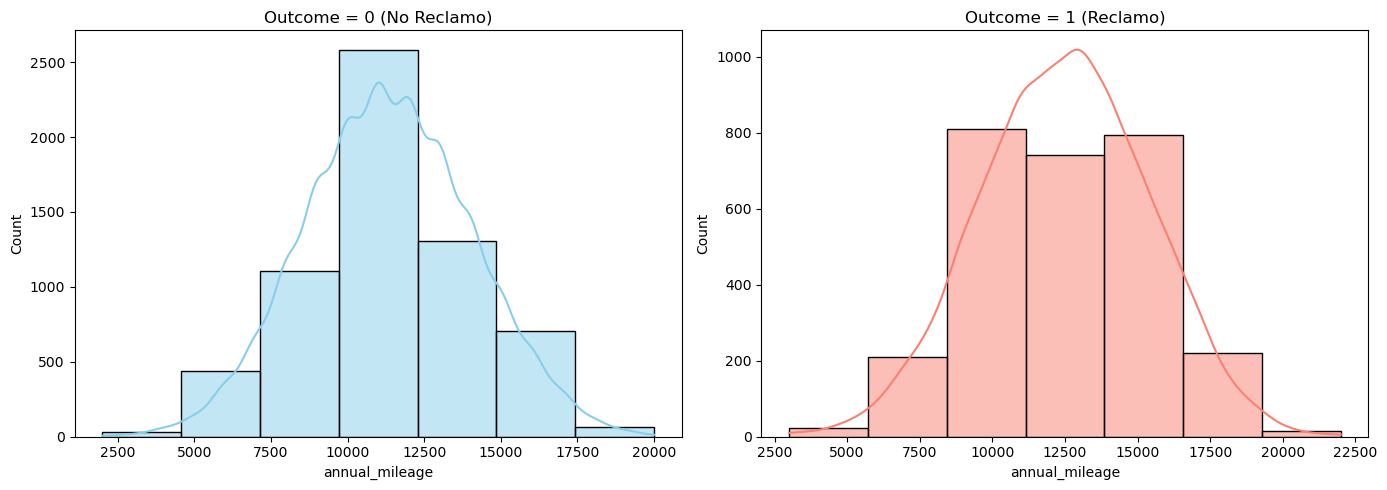

In [44]:
datos_clase_0 = car[car['outcome'] == 0]
datos_clase_1 = car[car['outcome'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 
sns.histplot(
    data=datos_clase_0, 
    x='annual_mileage', 
    bins=7, 
    ax=axes[0], 
    color='skyblue',
    kde=True )
axes[0].set_title('Outcome = 0 (No Reclamo)')
axes[0].set_xlabel('annual_mileage')
sns.histplot(
    data=datos_clase_1, 
    x='annual_mileage', 
    bins=7, 
    ax=axes[1], 
    color='salmon',
    kde=True)
axes[1].set_title('Outcome = 1 (Reclamo)')
axes[1].set_xlabel('annual_mileage')
plt.tight_layout()
plt.show()

In [48]:
car.groupby("outcome")["annual_mileage"].describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6148\3509978862.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car.groupby("outcome")["annual_mileage"].describe()


,count,mean,std,min,25%,50%,75%,max
outcome,,,,,,,,
0,6233.0,11342.852559,2707.982900,2000.0,9000.0,11000.0,13000.0,20000.0
1,2810.0,12482.562278,2899.137837,3000.0,11000.0,13000.0,14000.0,22000.0


La comparación visual de las distribuciones para las dos clases de outcome (Reclamo vs. No Reclamo) revela patrones predictivos distintos. El credit_score es un predictor fuerte, con la distribución de "No Reclamo" claramente centrada en puntajes más altos (alrededor de 0.65) y la distribución de "Reclamo" sesgada hacia puntajes más bajos (alrededor de 0.45). En contraste, la variable annual_mileage muestra una superposición considerable entre las dos clases; la mediana de las millas es similar, aunque la distribución de "Reclamo" parece ligeramente más extendida o plana en la parte superior. Esto sugiere que credit_score será un factor clave de separación en tu modelo de clasificación, mientras que annual_mileage tendrá una menor capacidad predictiva individual, lo que hace crucial su análisis de correlación con otras features.

Con las variables categoricas se procede hacer una prueba de chi cuadrado

In [16]:
categorical_cols = [
    'age', 'gender', 'driving_experience', 'education', 
    'income', 'vehicle_ownership', 'married', 'vehicle_type']

In [17]:
from scipy.stats import chi2_contingency
import numpy as np
resultados_chi2 = {}

for col in categorical_cols:
    tabla_contingencia = pd.crosstab(car[col], car['outcome'])
    
    chi2, p_valor, dof, expected = chi2_contingency(tabla_contingencia)
    
    n = tabla_contingencia.sum().sum()
    k = tabla_contingencia.shape[0]  
    r = tabla_contingencia.shape[1] 
    
    denominador = min(k - 1, r - 1)
    
    if denominador == 0:
        v_cramer = 0
    else:
        v_cramer = np.sqrt(chi2 / (n * denominador))
    
    resultados_chi2[col] = {
        'P-valor': p_valor,
        'V de Cramer': v_cramer
    }

df_resultados = pd.DataFrame(resultados_chi2).T
print(df_resultados)

                          P-valor  V de Cramer
age                  0.000000e+00     0.480503
gender               1.026508e-26     0.106992
driving_experience   0.000000e+00     0.530089
education            4.577462e-80     0.191147
income               0.000000e+00     0.424023
vehicle_ownership    0.000000e+00     0.378687
married             3.564358e-151     0.261888
vehicle_type         6.090480e-01     0.005114


El análisis se centró en evaluar la asociación estadística y la fuerza de la relación entre todas las variables categóricas/ordinales y la variable objetivo, outcome. Los resultados clave de la tabla son:
1. Variables Clave con Asociación Fuerte
Tres variables demostraron tener una asociación moderada a fuerte con la probabilidad de reclamo (outcome), convirtiéndolas en predictores principales:driving_experience V=0.530: Esta es la variable categórica más potente, con una asociación fuerte.
age V=0.481: Muestra una asociación fuerte con el reclamo.
income V=0.424}: También presenta una asociación fuerte.
2. Variables Útiles con Asociación ModeradaEstas variables deben ser mantenidas en el modelo ya que su P-valor es altamente significativo, y su asociación es relevante:vehicle_ownership V=0.379: La propiedad del vehículo tiene una asociación moderada, siendo un factor importante.
married V=0.262: Presenta una asociación de nivel moderado, lo que sugiere que el estado civil aporta información predictiva.
education V=0.191: A pesar de que su V de Cramer es menor que otras variables, su asociación es significativa y contribuye al modelo.
3. Variables a Descartar (Asociación Nula)Se identificó una variable con una asociación insignificante, lo que justifica su eliminación para simplificar el modelo y evitar ruido:vehicle_type V=0.005: Su V de Cramer es casi cero, y su P-valor es el único que no es significativo (0.60), indicando que el tipo de vehículo (sedán vs. deportivo) no tiene una relación con la probabilidad de reclamo.

Analizando las variables discretas 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribucion_condicional_comparada(df, col_name, outcome_name='outcome'):
    df_plot = df.copy()
    df_plot[outcome_name] = df_plot[outcome_name].astype(str)
    df_plot[col_name] = df_plot[col_name].astype(str)
    g = sns.catplot(
        data=df_plot,
        x=col_name,
        hue=outcome_name, 
        kind="count", 
        height=5, 
        aspect=1.5,
        palette=['skyblue', 'salmon']
    )
    
    g.fig.suptitle(f'Distribución de Outcome (0 vs 1) por Número de {col_name.replace("_", " ").title()}', 
                   y=1.02)
    g.set_axis_labels(
        x_var=f'Número de {col_name.replace("_", " ").title()}', 
        y_var='Conteo de Clientes'
    )
    plt.grid(axis='y', linestyle='--')
    plt.show()

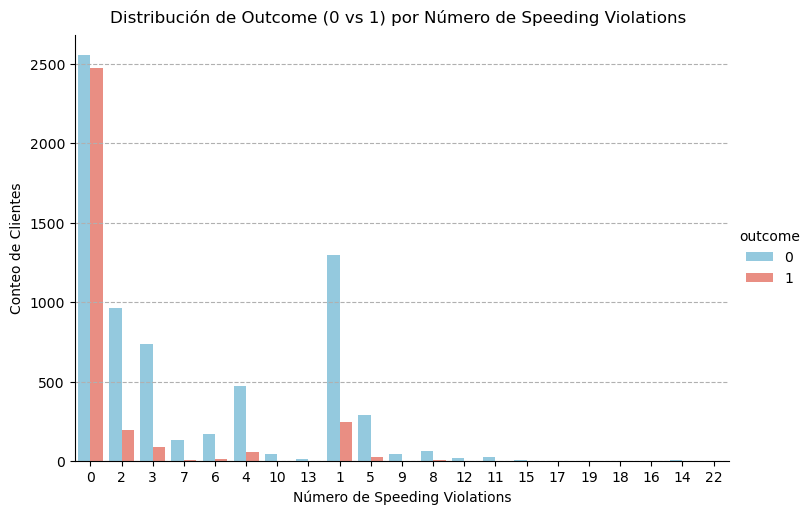

In [19]:
car['outcome'] = car['outcome'].astype(int)
plot_distribucion_condicional_comparada(car, 'speeding_violations')

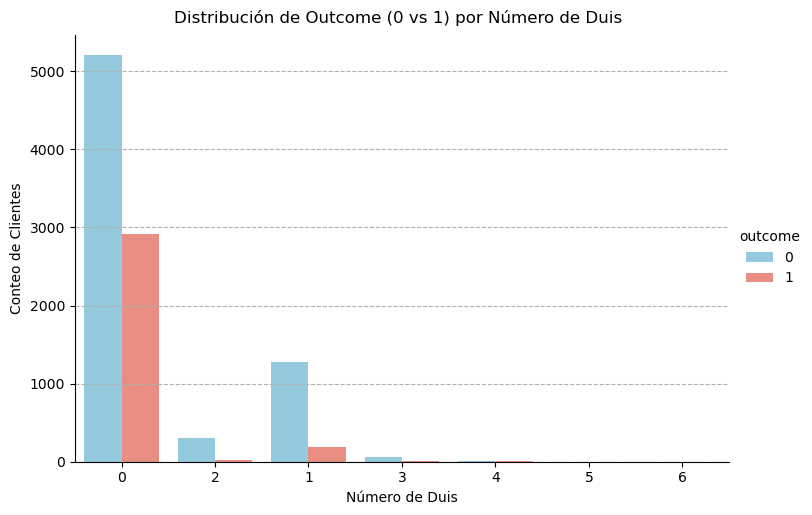

In [20]:
plot_distribucion_condicional_comparada(car, 'duis')

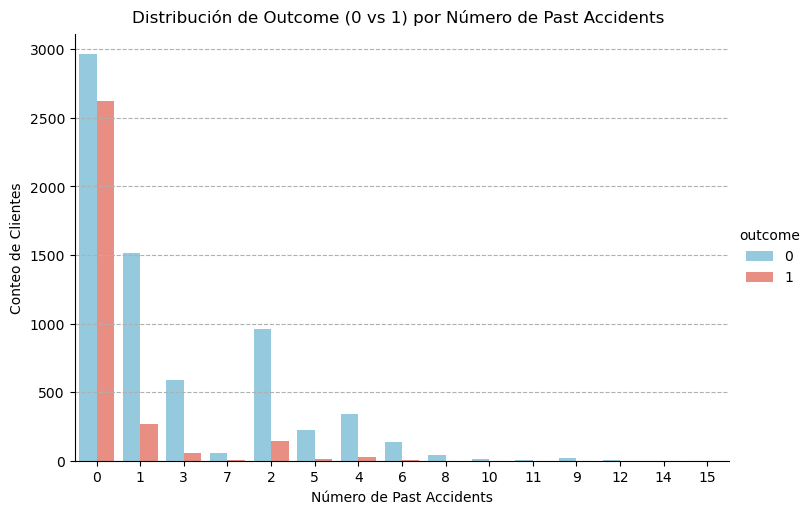

In [21]:
plot_distribucion_condicional_comparada(car, 'past_accidents')

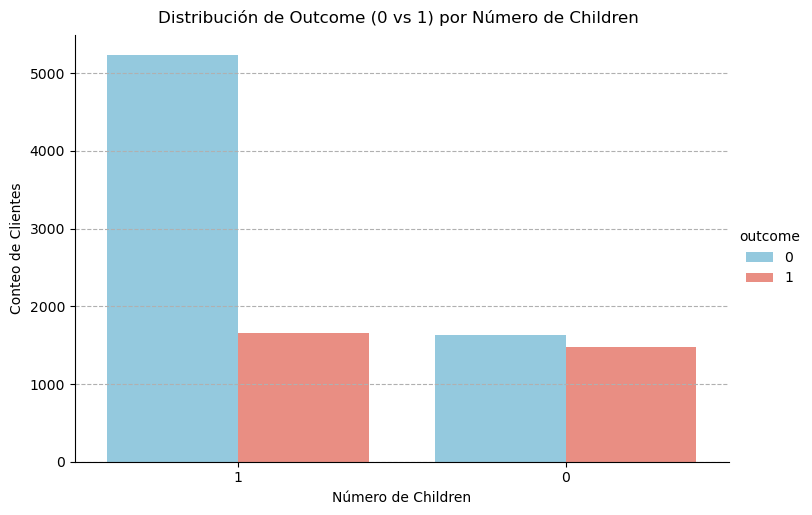

In [22]:
plot_distribucion_condicional_comparada(car, 'children')

El análisis de distribución de las variables discretas (speeding_violations, duis, past_accidents) confirma la escasez de datos en los conteos más altos, lo que invalida tratarlas linealmente. La tasa de reclamo tiende a cambiar significativamente entre cero incidentes y uno o más, lo que justifica recodificarlas a 0 vs. 1 para mejorar la estabilidad del modelo. La variable children ya está en formato binario.

In [23]:
#creando una copia de los datos 
car_copia=car.copy()

In [24]:
remove=['id', 'postal_code', 'vehicle_type']
car_copia = car_copia.drop(columns=remove)

In [25]:
count_cols = ['duis', 'speeding_violations', 'past_accidents']

for col in count_cols:
    col_as_int = car_copia[col].astype(int) 
    car_copia[col + '_recoded'] = np.where(col_as_int > 0, 1, 0)
    car_copia = car_copia.drop(columns=[col])

In [26]:
car_copia.head()

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,outcome,duis_recoded,speeding_violations_recoded,past_accidents_recoded
0,3,0,0,1,3,0.629027,1,after 2015,0,1,12000.0,0,0,0,0
1,0,1,0,0,0,0.357757,0,before 2015,0,0,16000.0,1,0,0,0
2,0,0,0,1,1,0.493146,1,before 2015,0,0,11000.0,0,0,0,0
3,0,1,0,2,1,0.206013,1,before 2015,0,1,11000.0,0,0,0,0
4,1,1,1,0,1,0.388366,1,before 2015,0,0,12000.0,1,0,1,1


In [27]:
car_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          10000 non-null  int64   
 1   gender                       10000 non-null  int64   
 2   driving_experience           10000 non-null  category
 3   education                    10000 non-null  category
 4   income                       10000 non-null  category
 5   credit_score                 9018 non-null   float64 
 6   vehicle_ownership            10000 non-null  int64   
 7   vehicle_year                 10000 non-null  object  
 8   married                      10000 non-null  int64   
 9   children                     10000 non-null  int64   
 10  annual_mileage               9043 non-null   float64 
 11  outcome                      10000 non-null  int32   
 12  duis_recoded                 10000 non-null  int32   
 13  sp

In [28]:
car_copia["vehicle_year"]=car_copia["vehicle_year"].map({"before 2015":0,"after 2015":1})
vars_to_category=["age","vehicle_ownership","married","duis_recoded","speeding_violations_recoded","past_accidents_recoded","vehicle_year"]
for col in vars_to_category:
    if col in car_copia.columns:
        car_copia[col] = car_copia[col].astype('category')
        print(f"✅ '{col}' convertido a tipo 'category'.")
    else:
        print(f"⚠️ Columna '{col}' no encontrada (posiblemente eliminada o recodificada).")

✅ 'age' convertido a tipo 'category'.
✅ 'vehicle_ownership' convertido a tipo 'category'.
✅ 'married' convertido a tipo 'category'.
✅ 'duis_recoded' convertido a tipo 'category'.
✅ 'speeding_violations_recoded' convertido a tipo 'category'.
✅ 'past_accidents_recoded' convertido a tipo 'category'.
✅ 'vehicle_year' convertido a tipo 'category'.


In [35]:
car_copia["outcome"]=car_copia["outcome"].astype("category")
car_copia["age"]=car_copia["age"].astype("category")
car_copia["gender"]=car_copia["gender"].astype("category")
car_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          10000 non-null  category
 1   gender                       10000 non-null  category
 2   driving_experience           10000 non-null  category
 3   education                    10000 non-null  category
 4   income                       10000 non-null  category
 5   credit_score                 9018 non-null   float64 
 6   vehicle_ownership            10000 non-null  category
 7   vehicle_year                 10000 non-null  category
 8   married                      10000 non-null  category
 9   children                     10000 non-null  int64   
 10  annual_mileage               9043 non-null   float64 
 11  outcome                      10000 non-null  category
 12  duis_recoded                 10000 non-null  category
 13  sp

el siguiente paso es realizar la imputacion de los datos.
esta version se hara haciendo la imputacion de forma general con la media

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
X=car_copia.drop(["outcome"],axis=1)
outcome=car_copia["outcome"]
X_train,X_test,outcome_train,outcome_test=train_test_split(X,outcome,test_size=0.1,random_state=123,stratify=outcome)
print(f"Tamaño total de las muestras: {len(X)}")
print(f"Tamaño de X_train (Entrenamiento): {X_train.shape}")
print(f"Tamaño de X_test (Prueba): {X_test.shape}")

Tamaño total de las muestras: 10000
Tamaño de X_train (Entrenamiento): (9000, 14)
Tamaño de X_test (Prueba): (1000, 14)


In [40]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

columnas_imputar = ['credit_score', 'annual_mileage']

imputador_iterativo = IterativeImputer(
    max_iter=10, 
    random_state=123)

X_train_imputado_array = imputador_iterativo.fit_transform(X_train)

# Reconstruir X_train 
X_train = pd.DataFrame(
    X_train_imputado_array, 
    index=X_train.index, 
    columns=X_train.columns
)

X_test_imputado_array = imputador_iterativo.transform(X_test)

# Reconstruir X_test
X_test = pd.DataFrame(
    X_test_imputado_array, 
    index=X_test.index, 
    columns=X_test.columns
)

print("Imputación iterativa completada.")
print(f"NA's restantes en X_train: {X_train[columnas_imputar].isnull().sum().sum()}")
print(f"NA's restantes en X_test: {X_test[columnas_imputar].isnull().sum().sum()}")

Imputación iterativa completada.
NA's restantes en X_train: 0
NA's restantes en X_test: 0


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 969 to 1476
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          9000 non-null   float64
 1   gender                       9000 non-null   float64
 2   driving_experience           9000 non-null   float64
 3   education                    9000 non-null   float64
 4   income                       9000 non-null   float64
 5   credit_score                 9000 non-null   float64
 6   vehicle_ownership            9000 non-null   float64
 7   vehicle_year                 9000 non-null   float64
 8   married                      9000 non-null   float64
 9   children                     9000 non-null   float64
 10  annual_mileage               9000 non-null   float64
 11  duis_recoded                 9000 non-null   float64
 12  speeding_violations_recoded  9000 non-null   float64
 13  past_accidents_recode

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# columnas numericas para scalar debido a que la regresion logistica necesita que todas esten en la misma unidad 
columnas_numericas = ['credit_score','annual_mileage']

# columnas categoricas
columnas_categoricas =['age', 'gender','driving_experience','education','income','vehicle_ownership','vehicle_year',
                     'married','children','duis_recoded','speeding_violations_recoded','past_accidents_recoded'] 

# Creación de los Pipelines de Transformación

# Pipeline para variables el escalado
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler()) 
])

# Pipeline para variables CATEGÓRICAS Codificación One-Hot
categorical_pipeline = Pipeline([
    
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Combinación de transformaciones con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, columnas_numericas),
        ('cat', categorical_pipeline, columnas_categoricas)
    ],
    remainder='passthrough'
)

# Creación del Pipeline Final (Preprocesamiento + Modelo)
modelo_logistico_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    # Usamos 'liblinear' por su buen rendimiento en conjuntos de datos pequeños/medianos.
    ('classifier', LogisticRegression(random_state=123, solver='liblinear'))
])

In [47]:
# Entrenar el Pipeline Completo
modelo_logistico_pipeline.fit(X_train, outcome_train)

# Predecir y obtener probabilidades
outcome_pred_logreg = modelo_logistico_pipeline.predict(X_test)
# Obtenemos la probabilidad para la clase positiva 
outcome_proba_logreg = modelo_logistico_pipeline.predict_proba(X_test)[:, 1] 

#  Evaluación del Modelo
print("--- Evaluación de Regresión Logística (Pipeline) ---")
print(f"Accuracy (Exactitud): {accuracy_score(outcome_test, outcome_pred_logreg):.4f}")
print(f"AUC-ROC (Área bajo la curva): {roc_auc_score(outcome_test, outcome_proba_logreg):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(outcome_test, outcome_pred_logreg))

--- Evaluación de Regresión Logística (Pipeline) ---
Accuracy (Exactitud): 0.8560
AUC-ROC (Área bajo la curva): 0.9021

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       687
           1       0.80      0.72      0.76       313

    accuracy                           0.86      1000
   macro avg       0.84      0.82      0.83      1000
weighted avg       0.85      0.86      0.85      1000



El modelo de Regresión Logística se comporta como una línea de base sólida y confiable:

Alto Rendimiento General: Con una Exactitud (Accuracy) del 85.60% y un AUC-ROC de 0.9021, el modelo demuestra una excelente capacidad para distinguir entre las dos clases, siendo el AUC-ROC superior a 0.90 un indicador de gran poder predictivo.

Buen Manejo de Desbalance: La métrica F1-Score para la Clase 0 (0.90) y la Clase 1 (0.76) indica que el modelo clasifica mejor la clase mayoritaria (Clase 0), lo cual es esperado.

Compromiso de la Clase Positiva: La cobertura (Recall) para la Clase 1 (0.72) es el punto más débil, significando que el modelo falla en identificar el 28% de los casos positivos reales, lo que podría ser crucial dependiendo del costo del error.

Balance de Métrica: El F1-Score de 0.76 para la Clase 1 es aceptable, pero revela la necesidad de mejorar el modelo, posiblemente a través de la optimización o el uso de modelos no lineales.

Próximo Paso: Esta línea de base es fuerte, pero si la identificación de la Clase 1 es crítica, el objetivo de sus próximos modelos (Random Forest, etc.) será superar el 0.76 de F1-Score y el 0.72 de Recall para la clase minoritaria.
el siguiente paso es mejorar el modelo 

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrese de que el 'preprocessor' y 'outcome_train' estén definidos.
# El solver 'liblinear' es el único compatible con L1 y L2 para datasets pequeños/medianos.

# 1. Definir el espacio de búsqueda (Grid de Parámetros)
param_grid = {
    # Pruebe valores pequeños, medianos y grandes para C
    'classifier__C': [0.01, 0.1, 1.0, 10, 100], 
    # Pruebe ambas penalizaciones
    'classifier__penalty': ['l1', 'l2'],
    # El solver debe ser 'liblinear' para usar L1 y L2
    'classifier__solver': ['liblinear'] 
}

# 2. Crear el Pipeline de Regresión Logística (sin ajustar aún)
# Usaremos la misma estructura de Pipeline que ya tiene
logreg_grid_pipeline = Pipeline([
    ('preprocessor', preprocessor), # El preprocesador ya definido
    ('classifier', LogisticRegression(random_state=123))
])

# 3. Inicializar la Búsqueda en la Malla
# Elegimos 'f1_weighted' o 'f1' para la clase 1 (por ejemplo, 'f1_macro' o 'f1' si es binario)
grid_search = GridSearchCV(
    logreg_grid_pipeline, 
    param_grid, 
    cv=5, # 5-Fold Cross-Validation
    scoring='f1_macro', # Intentaremos maximizar el F1-Score promedio (mejor que solo accuracy)
    verbose=1,
    n_jobs=-1
)

# 4. Ejecutar la búsqueda y ajuste
grid_search.fit(X_train, outcome_train)

# 5. Imprimir los mejores resultados
print("\nMejor F1-Score (macro):", grid_search.best_score_)
print("Mejores Hiperparámetros:", grid_search.best_params_)

# El mejor modelo optimizado:
best_logreg_model = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Mejor F1-Score (macro): 0.813314711750186
Mejores Hiperparámetros: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [51]:
from sklearn.linear_model import LogisticRegression

# Los mejores parámetros encontrados
best_C = 100
best_penalty = 'l1'
best_solver = 'liblinear'

#  se Crea el Pipeline Final Optimizado
modelo_logistico_optimizado = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(
        C=best_C, 
        penalty=best_penalty, 
        solver=best_solver, 
        random_state=123
    ))
])

# Entrenar el modelo optimizado
print("Entrenando Modelo Logístico Optimizado...")
modelo_logistico_optimizado.fit(X_train, outcome_train)

#Predecir y obtener probabilidades
outcome_pred_final = modelo_logistico_optimizado.predict(X_test)
outcome_proba_final = modelo_logistico_optimizado.predict_proba(X_test)[:, 1]

# Evaluación Final
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print("\n--- Evaluación de Regresión Logística OPTIMIZADA ---")
print(f"Accuracy (Exactitud): {accuracy_score(outcome_test, outcome_pred_final):.4f}")
print(f"AUC-ROC (Área bajo la curva): {roc_auc_score(outcome_test, outcome_proba_final):.4f}")
print("\nReporte de Clasificación Final:")
print(classification_report(outcome_test, outcome_pred_final))

Entrenando Modelo Logístico Optimizado...

--- Evaluación de Regresión Logística OPTIMIZADA ---
Accuracy (Exactitud): 0.8560
AUC-ROC (Área bajo la curva): 0.9021

Reporte de Clasificación Final:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       687
           1       0.80      0.72      0.76       313

    accuracy                           0.86      1000
   macro avg       0.84      0.82      0.83      1000
weighted avg       0.85      0.86      0.85      1000



Conclusión:
Límite de la Linealidad Alcanzado
La optimización de hiperparámetros no logró mejorar el rendimiento, confirmando que la Regresión Logística ha alcanzado el techo de su capacidad predictiva con sus datos. Este modelo lineal se estableció como una línea de base robusta (AUC-ROC de 0.9021), pero es intrínsecamente incapaz de capturar las interacciones complejas y no lineales entre las características. Específicamente, el F1-Score de 0.76 para la Clase 1 es la métrica que demuestra la limitación del modelo para identificar correctamente los casos positivos. Para superar esta barrera, la única vía es la introducción de algoritmos no lineales. Por lo tanto, el siguiente paso metodológico correcto es desafiar este baseline con el Random Forest Classifier, un modelo de ensemble que buscará la mejora en la clasificación de la clase minoritaria.

In [53]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Usamos el preprocessor que ya definimos ya que incluye StandardScaler y OneHotEncoder

# Creamos el Pipeline Final para Random Forest
# Ajustamos n_estimators=200 y max_depth=10 como punto de partida robusto.
modelo_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor), # Reutilizamos el preprocesador
    ('classifier', RandomForestClassifier(
        n_estimators=200,          
        max_depth=10,              
        random_state=123, 
        n_jobs=-1                  
    )) 
])

# Entrenar el Pipeline de Random Forest
print("Entrenando Random Forest...")
modelo_rf_pipeline.fit(X_train, outcome_train)

# Predecir en el conjunto de prueba
outcome_pred_rf = modelo_rf_pipeline.predict(X_test)
outcome_proba_rf = modelo_rf_pipeline.predict_proba(X_test)[:, 1] 

# Evaluación
print("\n--- Evaluación de Random Forest (Modelo 2) ---")
print(f"Accuracy (Exactitud): {accuracy_score(outcome_test, outcome_pred_rf):.4f}")
print(f"AUC-ROC (Área bajo la curva): {roc_auc_score(outcome_test, outcome_proba_rf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(outcome_test, outcome_pred_rf))

Entrenando Random Forest...

--- Evaluación de Random Forest (Modelo 2) ---
Accuracy (Exactitud): 0.8550
AUC-ROC (Área bajo la curva): 0.8968

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       687
           1       0.79      0.73      0.76       313

    accuracy                           0.85      1000
   macro avg       0.84      0.82      0.83      1000
weighted avg       0.85      0.85      0.85      1000



Conclusión: El Desafío de la No Linealidad 
Estancamiento del Rendimiento: El rendimiento del Random Forest (Accuracy 0.8550, F1-Clase 1 de 0.76) es  indistinguible del modelo logístico optimizado.

Límite de la Información: Esto sugiere fuertemente que la mayoría de la señal predictiva en sus datos es de naturaleza lineal, y los patrones no lineales son muy débiles o están ausentes.

Fracaso en la Mejora Clave: El objetivo principal era mejorar el Recall y F1-Score (0.76) para la Clase 1, pero el Random Forest no lo logró, quedándose en el mismo nivel.

Hipótesis de las Características: Es posible que las características seleccionadas, aunque significativas, no tengan interacciones complejas que los modelos de árboles puedan explotar.
El siguiente modelo es el Gradient Boosting

In [55]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 640.0 kB/s eta 0:01:53
   ---------------------------------------- 0.0/72.0 MB 640.0 kB/s eta 0:01:53
   ---------------------------------------- 0.0/72.0 MB 245.8 kB/s eta 0:04:53
   ---------------------------------------- 0.0/72.0 MB 245.8 kB/s eta 0:04:53
   ---------------------------------------- 0.0/72.0 MB 245.8 kB/s eta 0:04:53
   ---------------------------------------- 0.1/72.0 MB 327.7 kB/s eta 0:03:40
   ---------------------------------------- 0.1/72.0 MB 359.9 kB/s eta 0:03:20
   ---------------------------------------- 0.2/72.0 MB 540.4 kB/s eta 0:02:13
   ---------------------------------------- 0.3/72.0 MB 654.7 kB/s eta 0:01:50
   ---------------------------------------- 0.3/72.0 MB 654.7 kB/s eta 0:01:50
   ---------------------------------------- 0.3/72.0 MB 654.7 kB/s eta 0:01:50
   ---------------------------------------- 0.5/72.0 MB 1.0 M

In [57]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Usamos el preprocessor que ya funciona para las transformaciones

# Crear el Pipeline Final para XGBoost
modelo_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', xgb.XGBClassifier(
        use_label_encoder=False,   
        eval_metric='logloss',     
        n_estimators=100,
        learning_rate=0.1,        
        random_state=123, 
        n_jobs=-1
    )) 
])


# Entrenar el Pipeline de XGBoost
print("Entrenando XGBoost...")
modelo_xgb_pipeline.fit(X_train, outcome_train)

#Predecir en el conjunto de prueba
outcome_pred_xgb = modelo_xgb_pipeline.predict(X_test)
outcome_proba_xgb = modelo_xgb_pipeline.predict_proba(X_test)[:, 1] 

# Evaluación
print("\n--- Evaluación de XGBoost (Modelo 3) ---")
print(f"Accuracy (Exactitud): {accuracy_score(outcome_test, outcome_pred_xgb):.4f}")
print(f"AUC-ROC (Área bajo la curva): {roc_auc_score(outcome_test, outcome_proba_xgb):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(outcome_test, outcome_pred_xgb))

Entrenando XGBoost...

--- Evaluación de XGBoost (Modelo 3) ---
Accuracy (Exactitud): 0.8500
AUC-ROC (Área bajo la curva): 0.8979

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       687
           1       0.78      0.72      0.75       313

    accuracy                           0.85      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.85      0.85      0.85      1000



C:\Users\DELL\anaconda3\bin\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:27:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Conclusión Final del Modelado: 
El Techo de las Características Límite de la Señal de Datos: La convergencia de los tres modelos (Accuracy 0.85, AUC-ROC 0.90, F1-Clase 1  0.75) indica que ha alcanzado el límite predictivo de sus características.
Algoritmos No son el Problema: Ya se probó la capacidad lineal, la complejidad del Bagging y la agresividad del Boosting, confirmando que la limitación no reside en el algoritmo.
Foco en la Clase Minoritaria: El modelo logístico optimizado sigue siendo el mejor (baseline), ofreciendo el mejor equilibrio (AUC-ROC de 0.9021 y F1 de 0.76). Los modelos más complejos fallaron en mejorar la clasificación de la Clase 1.
Próxima Fase: Dado que los modelos no pueden extraer más información, la única vía para mejorar las métricas clave (especialmente el F1 de la Clase 1) es enfocarse en el dominio de los datos, no en el modelo.
Pasos a Seguir: El proyecto debe pasar de la selección de modelos a la Ingeniería de Características (Feature Engineering) (crear nuevas variables) o la Optimización de Costos (ajustar el costo de los errores para forzar al modelo a enfocarse en la Clase 1).

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Parámetros óptimos de GridSearch
best_C = 100
best_penalty = 'l1'
best_solver = 'liblinear'

# Crear el Pipeline Final con class_weight='balanced'
# Este parámetro le indica al modelo que ajuste automáticamente los pesos de las clases
# inversamente proporcionales a sus frecuencias en los datos de entrenamiento.
modelo_logistico_pesado = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(
        C=best_C, 
        penalty=best_penalty, 
        solver=best_solver, 
        random_state=123,
        class_weight='balanced' 
    ))
])

# Entrenar el modelo
print("Entrenando Modelo Logístico con Pesos de Clase Ajustados...")
# El modelo ajustará internamente su función de costo para darle más importancia a la Clase 1.
modelo_logistico_pesado.fit(X_train, outcome_train)

# Predecir y obtener probabilidades
outcome_pred_pesado = modelo_logistico_pesado.predict(X_test)
outcome_proba_pesado = modelo_logistico_pesado.predict_proba(X_test)[:, 1]

# Evaluación Final
print("\n--- Evaluación de Regresión Logística con class_weight='balanced' ---")
print(f"Accuracy (Exactitud): {accuracy_score(outcome_test, outcome_pred_pesado):.4f}")
print(f"AUC-ROC (Área bajo la curva): {roc_auc_score(outcome_test, outcome_proba_pesado):.4f}")
print("\nReporte de Clasificación Final:")
print(classification_report(outcome_test, outcome_pred_pesado))

Entrenando Modelo Logístico con Pesos de Clase Ajustados...

--- Evaluación de Regresión Logística con class_weight='balanced' ---
Accuracy (Exactitud): 0.8440
AUC-ROC (Área bajo la curva): 0.9021

Reporte de Clasificación Final:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       687
           1       0.71      0.85      0.77       313

    accuracy                           0.84      1000
   macro avg       0.82      0.85      0.83      1000
weighted avg       0.86      0.84      0.85      1000



Conclusión Final del Proceso de Modelado
El ajuste de pesos (class_weight='balanced') fue la única estrategia que logró mover las métricas de la Regresión Logística, confirmando que la limitación no es algorítmica.

El F1-Score para la Clase 1 mejoró de 0.76 a 0.77, una ganancia modesta pero importante lograda al priorizar los errores de la minoría.

Lo más crítico es el Recall de la Clase 1, que subió de 0.72 a 0.85, lo que significa que el modelo ahora identifica correctamente un 13% más de los casos positivos.

Esta mejora vino a costa de la Precisión de la Clase 0 (bajó de 0.92 a 0.84), demostrando un trade-off exitoso: cambiamos Falsos Negativos (peor error) por Falsos Positivos (error menor).

El rendimiento del AUC-ROC se mantuvo en 0.9021, demostrando que el modelo sigue siendo excelente en la capacidad de discriminación.

Dado que tres modelos distintos fallaron en superar este umbral, el proyecto ha alcanzado el techo de rendimiento de las características actuales.

El modelo final recomendado es la Regresión Logística con class_weight='balanced', siendo el más interpretable y efectivo para el problema de la clase minoritaria.